# Attaching Distances

Apparently some of the races scraped are 5ks, so we need to take a look and correctly label the ones that are.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [37]:
times = pd.read_csv('nirca_historical_times.csv')
times.head()

,Unnamed: 0,Place,Score,Club,Last Name,First Name,Class,Result,race,url,date,distance,sex
0,0,1.0,1.0,North Carolina State University,Chandler II,Max,ALUMN,1589.29,NIRCA XC Regional Championship (Southeast),race_results.php?race=248,"October 24, 2015",8k,M
1,1,2.0,2.0,North Carolina State University,Baraldi,Robert,SR,1590.30,NIRCA XC Regional Championship (Southeast),race_results.php?race=248,"October 24, 2015",8k,M
2,2,3.0,3.0,University of Tennessee,Brey,Nick,ALUMN,1593.33,NIRCA XC Regional Championship (Southeast),race_results.php?race=248,"October 24, 2015",8k,M
3,3,4.0,4.0,North Carolina State University,Rees-Jones,Josh,ALUMN,1606.46,NIRCA XC Regional Championship (Southeast),race_results.php?race=248,"October 24, 2015",8k,M
4,4,5.0,5.0,Duke University,Cardel,Patrick,ALUMN,1615.55,NIRCA XC Regional Championship (Southeast),race_results.php?race=248,"October 24, 2015",8k,M


The usual distance run in college is a 8k for men and 6k for women. However, some schools in club running are limited in space, so they'll host a 5k instead. There are a few 5k's in this dataset that are not labeled, and need to be as it will throw off our analysis. This is obvious when making a histogram of all the times in one sex

<AxesSubplot:>

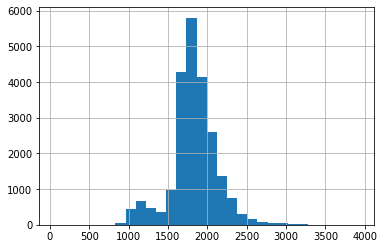

In [4]:
%matplotlib inline
times['Result'][times['sex'] == 'M'].hist(bins = 30)

With 5ks in the dataset, a bimodal distribution appears, with a clump of 5k results in front of the rest of the 8k results. 

The women's results dont see such a contrast because the difference in their race is only a kilometer. A fast 6k runner will end up with a moderate to slow 5k time, so instead of a pronounced bimodal look, the distribution for female times just appears to have a more gentle slope on the left.

<AxesSubplot:>

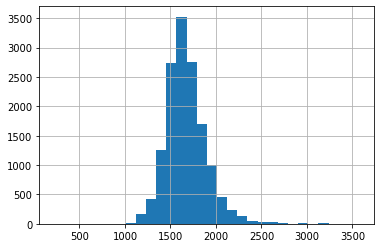

In [7]:
%matplotlib inline
times['Result'][times['sex'] == 'F'].hist(bins = 30) 

Luckily, the virginia tech club running's website has a list of all their races from 2014-2019, with distances attached. Hopefully this clears up most of the races.

http://www.runningclub.org.vt.edu/?page_id=4512

In [38]:
times.race = times.race.map(lambda x: x.strip().lower()) # make browing the races easier
times

,Unnamed: 0,Place,Score,Club,Last Name,First Name,Class,Result,race,url,date,distance,sex
0,0,1.0,1.0,North Carolina State University,Chandler II,Max,ALUMN,1589.29,nirca xc regional championship (southeast),race_results.php?race=248,"October 24, 2015",8k,M
1,1,2.0,2.0,North Carolina State University,Baraldi,Robert,SR,1590.30,nirca xc regional championship (southeast),race_results.php?race=248,"October 24, 2015",8k,M
2,2,3.0,3.0,University of Tennessee,Brey,Nick,ALUMN,1593.33,nirca xc regional championship (southeast),race_results.php?race=248,"October 24, 2015",8k,M
3,3,4.0,4.0,North Carolina State University,Rees-Jones,Josh,ALUMN,1606.46,nirca xc regional championship (southeast),race_results.php?race=248,"October 24, 2015",8k,M
4,4,5.0,5.0,Duke University,Cardel,Patrick,ALUMN,1615.55,nirca xc regional championship (southeast),race_results.php?race=248,"October 24, 2015",8k,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37208,38208,141.0,-,Central Michigan University,Kosnak,Katie,GRAD,2002.22,nirca cross country national championships,race_results.php?race=844,"November 16, 2019",6k,F
37209,38209,142.0,-,Columbia University,Mehta,Sukanya,SR,2012.32,nirca cross country national championships,race_results.php?race=844,"November 16, 2019",6k,F
37210,38210,143.0,-,University of Maryland Baltimore County,Gregory,Katelyn,GRAD,2026.46,nirca cross country national championships,race_results.php?race=844,"November 16, 2019",6k,F
37211,38211,144.0,-,George Mason University,Burris,Rebecca,SR,2061.21,nirca cross country national championships,race_results.php?race=844,"November 16, 2019",6k,F


In [42]:
times.distance = np.where((times.race == 'charlotte mcalpine trail race'), '5k', times.distance)

In [13]:
sum(times.distance == '5k')

585

Looks like we got a good number of them with just that, lets look at the mens distribution to see how it changed.

<AxesSubplot:>

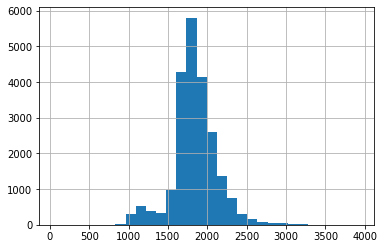

In [20]:
%matplotlib inline
times['Result'][(times.distance == '8k') & (times.sex == 'M')].hist(bins = 30)

not a lot better, lets just look at the fastest times and check the races asscociated

In [39]:
times[times.sex == 'M'].sort_values(by = 'Result').head(50)

,Unnamed: 0,Place,Score,Club,Last Name,First Name,Class,Result,race,url,date,distance,sex
16966,17450,117.0,0,Kennesaw State University,Onyeije,Nnamdi,SO,60.00,nirca cross country southeast regional,race_results.php?race=688,"October 21, 2018",8k,M
13229,13598,117.0,0,Kennesaw State University,Onyeije,Nnamdi,SO,60.00,nirca cross country southeast regional,race_results.php?race=688,"October 21, 2018",8k,M
3493,3608,146.0,0,University at Buffalo,Ibrahim,Abdulrahman,GRAD,61.00,nirca xc regional championship (northeast),race_results.php?race=246,"October 31, 2015",8k,M
356,356,146.0,0,University at Buffalo,Ibrahim,Abdulrahman,GRAD,61.00,nirca xc regional championship (northeast),race_results.php?race=246,"October 31, 2015",8k,M
7135,7348,51.0,26.0,West Virginia University,Reed,Nathan,GRAD,64.00,mountaineer tune-up,race_results.php?race=386,"October 15, 2016",8k,M
7136,7349,52.0,0,University of Pittsburgh,Goldhorn,Eric,ALUMN,67.00,mountaineer tune-up,race_results.php?race=386,"October 15, 2016",8k,M
21381,21910,226.0,(115),Merrimack College,Gately,Sean,SO,77.00,nirca cross country northeast regional,race_results.php?race=837,"October 26, 2019",8k,M
18381,18909,226.0,(115),Merrimack College,Gately,Sean,SO,77.00,nirca cross country northeast regional,race_results.php?race=837,"October 26, 2019",8k,M
6593,6805,1.0,1,University of Oregon,Walker,Andre,GRAD,878.38,uo running club race,race_results.php?race=414,"October 8, 2016",8k,M
6594,6806,2.0,2,University of Oregon,Jones,Ryan,GRAD,886.46,uo running club race,race_results.php?race=414,"October 8, 2016",8k,M


In [27]:
pd.set_option('display.max_rows', 100) # change display settings rq

In [40]:
known_5ks = ['uo running club race', 'kasey skinner memorial invitational', 'spartan grand classic', 
             'run with the pack 5k', 'run with the pack', 'oregon invite', 'illinois state university invitational',
            'terrier xc invitational 2015', 'north carolina state invitational']

for i in known_5ks:
    times.distance = np.where((times.race == i), '5k', times.distance)

In [48]:
# one 6k in there for some reason
times.distance = np.where((times.race == 'illinois state university 6k'), '6k', times.distance)

Check the top times once more

In [43]:
times[(times.sex == 'M') & (times.distance == '8k')].sort_values(by = 'Result').head(50)

,Unnamed: 0,Place,Score,Club,Last Name,First Name,Class,Result,race,url,date,distance,sex
16966,17450,117.0,0,Kennesaw State University,Onyeije,Nnamdi,SO,60.00,nirca cross country southeast regional,race_results.php?race=688,"October 21, 2018",8k,M
13229,13598,117.0,0,Kennesaw State University,Onyeije,Nnamdi,SO,60.00,nirca cross country southeast regional,race_results.php?race=688,"October 21, 2018",8k,M
3493,3608,146.0,0,University at Buffalo,Ibrahim,Abdulrahman,GRAD,61.00,nirca xc regional championship (northeast),race_results.php?race=246,"October 31, 2015",8k,M
356,356,146.0,0,University at Buffalo,Ibrahim,Abdulrahman,GRAD,61.00,nirca xc regional championship (northeast),race_results.php?race=246,"October 31, 2015",8k,M
7135,7348,51.0,26.0,West Virginia University,Reed,Nathan,GRAD,64.00,mountaineer tune-up,race_results.php?race=386,"October 15, 2016",8k,M
7136,7349,52.0,0,University of Pittsburgh,Goldhorn,Eric,ALUMN,67.00,mountaineer tune-up,race_results.php?race=386,"October 15, 2016",8k,M
21381,21910,226.0,(115),Merrimack College,Gately,Sean,SO,77.00,nirca cross country northeast regional,race_results.php?race=837,"October 26, 2019",8k,M
18381,18909,226.0,(115),Merrimack College,Gately,Sean,SO,77.00,nirca cross country northeast regional,race_results.php?race=837,"October 26, 2019",8k,M
8914,9173,10.0,10,Stanford University,Buenz,Benedikt,ALUMN,1200.00,pacific regional,race_results.php?race=537,"October 28, 2017",8k,M
12557,12898,10.0,10,Stanford University,Buenz,Benedikt,ALUMN,1200.00,pacific regional,race_results.php?race=537,"October 28, 2017",8k,M


Looking at the 2017 pacific regional results page, It's clear that something went wrong with the timing, as all of the results are listed at 20 mins, and last years NCAA D1 champion ran a 30 min 8k, so I think I can safely remove these times. In addition, there are some times incorrectly entered, and given that there are only 8 of them, I think I can safely remove those as well. 

I (Matt Rogers) also know that the 2017 mid-atlantic regional had messed up times because I ran in the race and had my time messed up. The womens race had accurate times, but sice the mens times are screwed with no way of knowing the correct ones, I'm going to drop that race as well.

In [46]:
times = times.drop(times[(times.sex == "M") & (times.Result < 1350)].index)
times = times.drop(times[(times.sex == "M") & (times.race == 'mid-atlantic regional') & (times.date == 'October 21, 2017')].index)

In [49]:
times[(times.sex == 'M') & (times.distance == '8k')].sort_values(by = 'Result').head(50)

,Unnamed: 0,Place,Score,Club,Last Name,First Name,Class,Result,race,url,date,distance,sex
19691,20220,2.0,2,University of Maryland,Flint,Rylan,SR,1369.49,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19692,20221,3.0,3,College of William and Mary,Wachter,Patrick,ALUMN,1372.52,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19693,20222,4.0,4,University of Maryland,McCullough,Brian,JR,1391.11,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19694,20223,5.0,5,University of Virginia,Evans,Casey,SO,1399.19,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19695,20224,6.0,6,University of Maryland,Welter,Mitchell,GRAD,1418.38,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19698,20227,9.0,9,University of Virginia,Walls,Ethan,SO,1428.48,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19697,20226,8.0,8,University of Virginia,Levine,Jeremy,GRAD,1428.48,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19696,20225,7.0,7,University of Virginia,Michael,John,SO,1428.48,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19699,20228,10.0,10,George Washington University,Schroeder,Samuel,ALUMN,1431.51,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19700,20229,11.0,11,University of Maryland,Rosemore,Josh,FR,1436.56,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M


That should be the mens times all sorted

<AxesSubplot:>

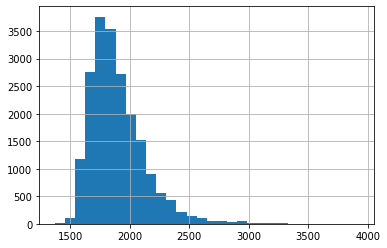

In [50]:
%matplotlib inline
times['Result'][(times.distance == '8k') & (times.sex == 'M')].hist(bins = 30)

Perfect, now to just check the womens for outliers or mistagged distances.

In [51]:
times[(times.sex == 'F') & (times.distance == '6k')].sort_values(by = 'Result').head(50)

,Unnamed: 0,Place,Score,Club,Last Name,First Name,Class,Result,race,url,date,distance,sex
23680,24286,1.0,0,Sacred Heart University,Garcia,Megan,ALUMN,227.47,uconn invitational,race_results.php?race=232,"September 19, 2015",6k,F
35361,36361,1.0,1,American University,Martin,Emma,SR,1091.11,d.c. invitational,race_results.php?race=811,"September 22, 2019",6k,F
34982,35982,1.0,-,Dartmouth College,Pennacchio,Caroline,GRAD,1099.19,running of the bulls,race_results.php?race=824,"September 14, 2019",6k,F
35362,36362,2.0,2,Georgetown University,Haney,Nell,SO,1142.02,d.c. invitational,race_results.php?race=811,"September 22, 2019",6k,F
22656,23185,1.0,1.0,University of Georgia,Ragsdale,Bre,ALUMN,1147.07,nirca xc regional championship (southeast),race_results.php?race=248,"October 24, 2015",6k,F
24564,25172,1.0,1.0,University of Georgia,Ragsdale,Bre,ALUMN,1147.07,nirca xc regional championship (southeast),race_results.php?race=248,"October 24, 2015",6k,F
35363,36363,3.0,3,Virginia Commonwealth University,Hudson,Maggie,SR,1148.08,d.c. invitational,race_results.php?race=811,"September 22, 2019",6k,F
35364,36364,4.0,4,University of Virginia,Robison,May,SR,1154.14,d.c. invitational,race_results.php?race=811,"September 22, 2019",6k,F
22657,23186,2.0,2.0,North Carolina State University,Davis,Carmen,ALUMN,1157.17,nirca xc regional championship (southeast),race_results.php?race=248,"October 24, 2015",6k,F
24565,25173,2.0,2.0,North Carolina State University,Davis,Carmen,ALUMN,1157.17,nirca xc regional championship (southeast),race_results.php?race=248,"October 24, 2015",6k,F


This looks great to me, the top time can be dropped, as it it mislabeled on the actual results page, but everything else is solid

In [52]:
times = times.drop(times[(times.sex == "F") & (times.Result < 300)].index)

All that's left is to check the womens 6k distribution and save the csv

<AxesSubplot:>

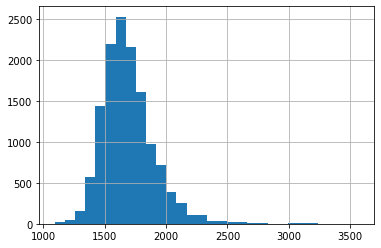

In [53]:
%matplotlib inline
times['Result'][(times.distance == '6k') & (times.sex == 'F')].hist(bins = 30)

save the final times as a csv for later parsing

In [54]:
times.to_csv("nirca_cleaned.csv")